Title: Anisotropic Filters
Author: Thomas M. Breuel
Institution: UniKL

Anisotropic Filters
================

Let's begin with some display functions.

In [12]:

from scipy.ndimage import filters
def ims(image,**kw):
    size = kw.get("s",8)
    if "s" in kw: del kw["s"]
    subplots(1,1,figsize=(size,size))
    gray(); imshow(image,origin='lower',**kw)
def imp(image,**kw):
    subplots(1,1,figsize=(6,6))
    gray(); imshow(image,origin='lower',interpolation='nearest',**kw)
def imrow(*args,**kw):
    gray()
    size = kw.get("s",8)
    if "s" in kw: del kw["s"]
    n = len(args)
    subplots(1,n,figsize=(n*size,size))
    for i,im in enumerate(args):
        subplot(1,n,i+1); imshow(im,origin='lower',**kw)
def rescale(image):
    return (image-amin(image))/max(1e-4,amax(image)-amin(image))

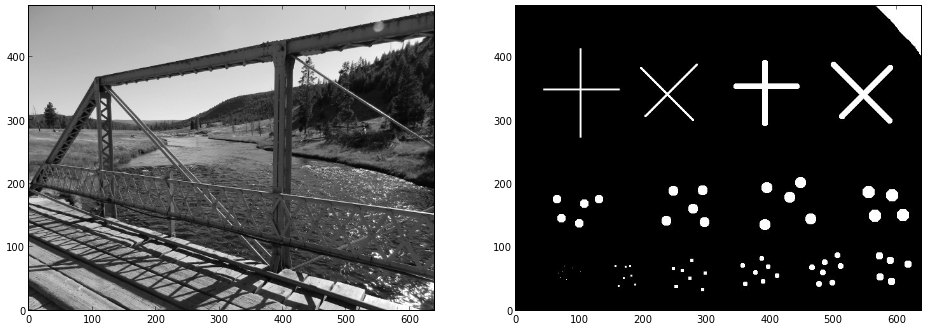

In [13]:
image = mean(imread("bridge.jpg")/255.0,axis=2)[::-1]
test = mean(imread("testimage.jpg")/255.0,axis=2)
imrow(image,test)

A filter is _isotropic_ if it works the same in all directions.
This is defined similar to shift invariance.

Let an image rotation operator be given by:

$$ R_{\theta}[I]\;(x,y) = I(x \cos\theta - y \sin\theta,x\sin\theta + y \cos\theta) $$

Then a filter is isotropic if:

$$ R[F[I]] = F[R[I]] $$


Another way of saying that is that rotating an image before or
after applying the filter gives the same result.

The Gaussian filters we have seen above have mostly been isotropic.
Let's look at an anisotropic Gaussian filter.

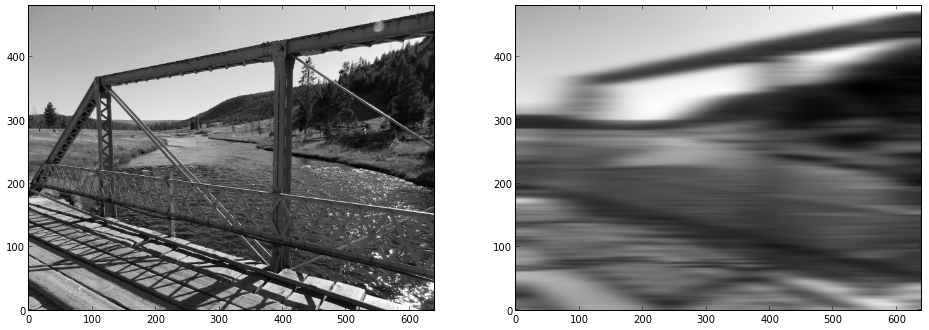

In [14]:
imrow(image,filters.gaussian_filter(image,(1.0,30.0)))

It is a bit difficult to tell from the above image what this filter does.  Let's look at the test image.

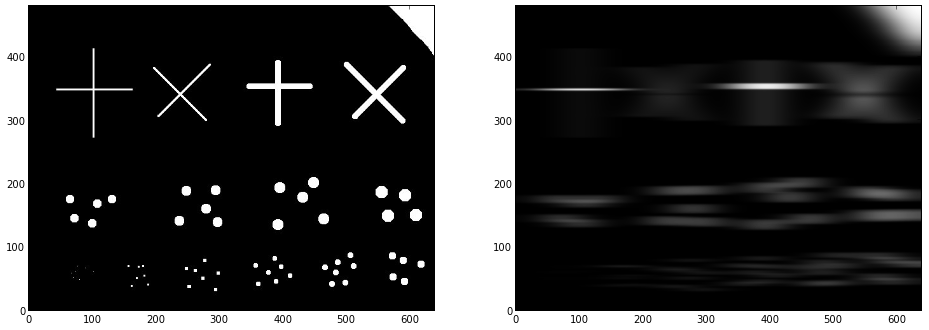

In [15]:
imrow(test,filters.gaussian_filter(test,(1.0,30.0)))

What we can infer from this is that this anisotropic Gaussian filter enhances horizontal lines.
One way of understanding that is to observe that the impulse response itself looks kind of like that.

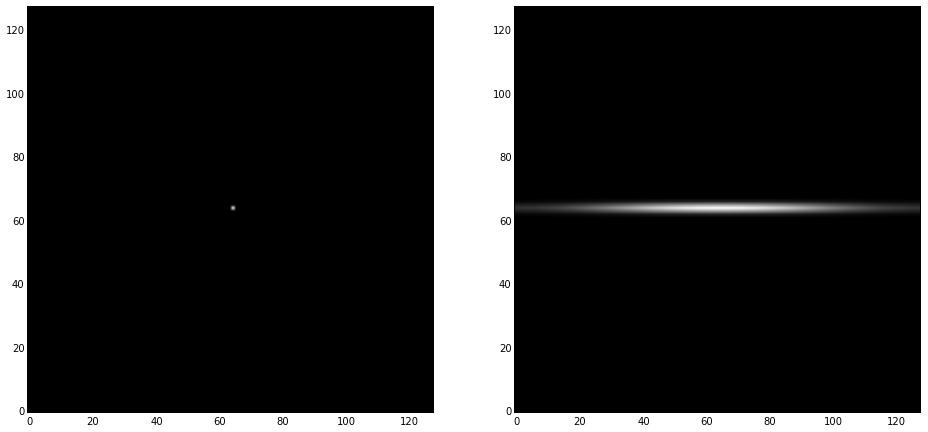

In [16]:
impulse = zeros((128,128)); impulse[64,64] = 1.0
imrow(impulse,filters.gaussian_filter(impulse,(1.0,30.0)))

In fact, one way of looking at linear filters is that of a "matched filter": a linear filter
will respond particularly strongly to parts of the image that "look like" the impulse response.

We only get two directions out of the definition of the Gaussian (horizontal and vertical), 
but we can construct more by explicitly rotating.

In [17]:
from scipy.ndimage import interpolation

def agf(image,alpha,sigma):
    rotated = interpolation.rotate(image,alpha,reshape=0)
    filtered = filters.gaussian_filter(rotated,sigma)
    return interpolation.rotate(filtered,-alpha,reshape=0)
    

In [18]:
images = array([agf(image,alpha,(1.0,8.0)) for alpha in linspace(0.0,90,32)])

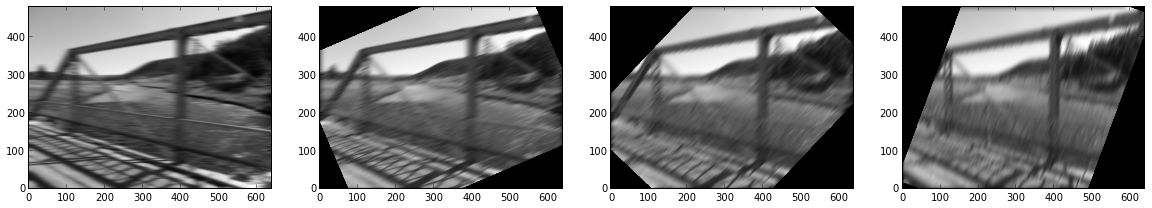

In [19]:
imrow(*images[::8],s=5)

This actually gives rise to a sometimes useful filtering operation
for detecting long linear structures when we combine it with a non-linear opeartion.

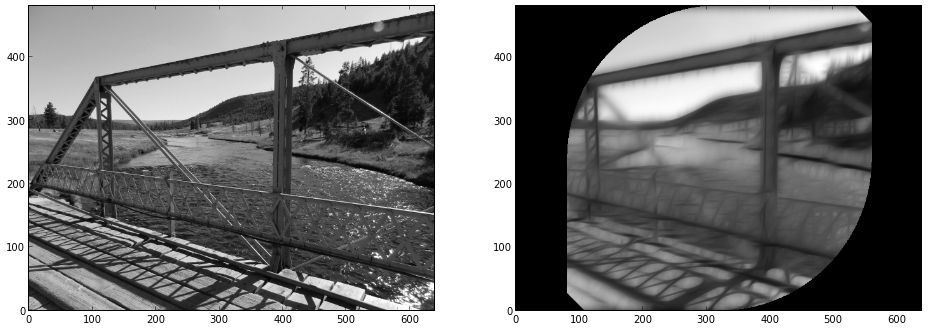

In [20]:
imrow(image,amin(images,axis=0))

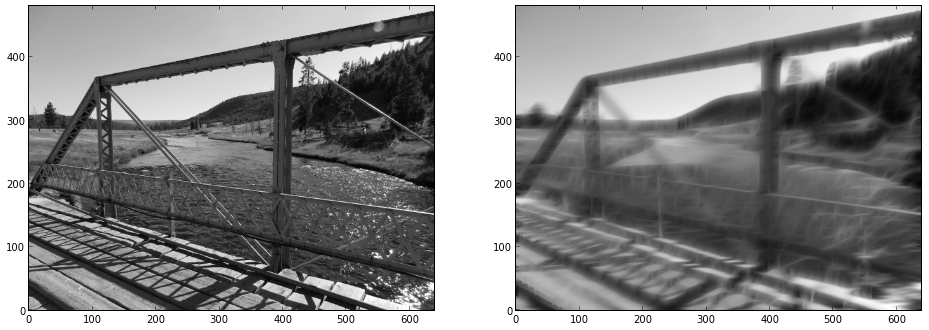

In [21]:
imrow(image,amax(images,axis=0))

We can understand the effect of these filters more easily on the test image.

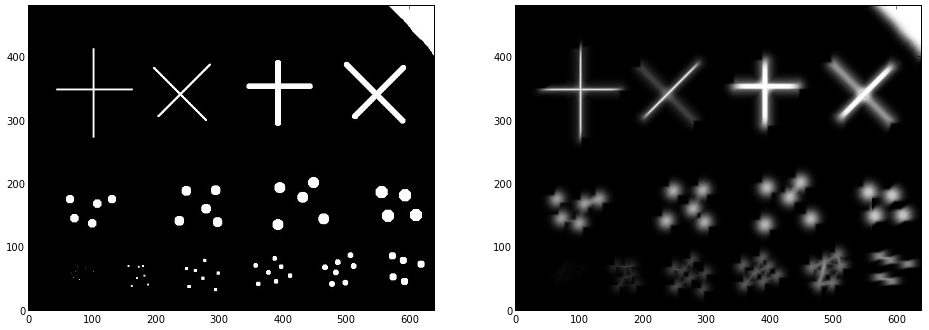

In [22]:
tests = array([agf(test,alpha,(1.0,8.0)) for alpha in linspace(0.0,90,65)])
imrow(test,amax(tests,axis=0))